In [1]:
import os
os.chdir("../")

In [2]:
from rdkit import Chem
from networkx.algorithms.clique import find_cliques
from networkx import to_numpy_matrix
from mmpa.mmp import MMP

In [3]:
# define input molecules
mol1 = Chem.MolFromSmiles('COc1cc(CCNC[C@@H](O)c2ccc(O)c(O)c2)ccc1OCCCc1ccccc1')
mol2 = Chem.MolFromSmiles('COc1cc(CCNC[C@H](O)c2ccc(O)c(O)c2)ccc1OCCCc1ccccc1')

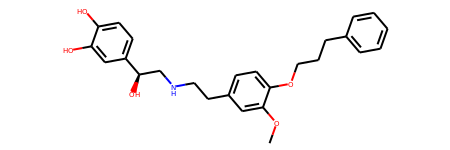

In [4]:
mol1

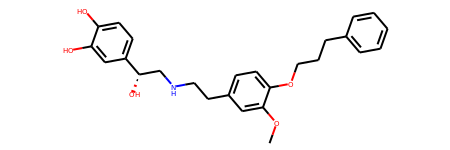

In [5]:
mol2

In [6]:
# prepare potential atom-atom mappings and create correspondence graph
mmp = MMP()
mmp.setMol1(mol1)
mmp.setMol2(mol2)
mmp.createCorrespondence(penalty=3.0)

In [7]:
# score the cliques and isolate RECS
cliques = list(find_cliques(mmp))
mmp.scoreCliques(cliques) 
mmp.eliminateMCS()

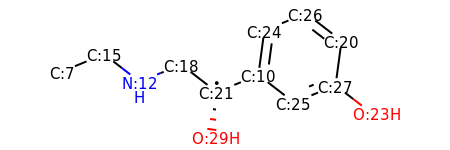

In [8]:
Chem.SanitizeMol(mmp.frag1)
mmp.frag1

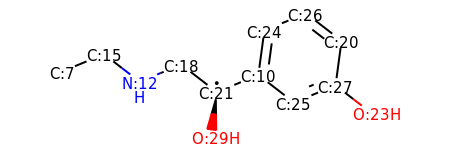

In [9]:
Chem.SanitizeMol(mmp.frag2)
mmp.frag2